In [87]:
# CS 181, Spring 2019
# Homework 4: Clustering and EM
# Name: Zach Dietz
# Email: zachdietz1@gmail.com

import numpy as np
import matplotlib.pyplot as plt

# This line loads the images for you. Don't change it!
pics = np.load("images.npy")

# Your code here. You may change anything below this line.
class PCA(object):
    # d is the number of principal components
    def __init__(self, d):
        self.d = d
        self.data = None
        self.mean = None
        self.standardized = None
        #self.cov = None
        self.PCs = None
        self.eigenvalues = None

    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images. This method should apply PCA to a dataset X.
    def apply(self, X):
        # save the data
        self.data = X
        # subtract the mean from the data
        self.mean = np.mean(X, axis = 0)
        mean_subtracted = np.subtract(pics, self.mean)
        self.standardized = np.matrix([i.flatten('C') for i in mean_subtracted]).T
        #self.cov = 1/ self.standardized.shape[0] * np.matmul(self.standardized.T,self.standardized)
        u, s, v = np.linalg.svd(self.standardized)
        self.PCs = u
        self.eigenvalues = np.square(s).T
    
    def plot_eigenvalues(self):
        # Plots the first d eigenvalues
        plt.figure()
        plt.plot(np.arange(self.d), self.eigenvalues[0:self.d])
        plt.suptitle("First 500 Eigenvalues Plotted by Significance")
        plt.xlabel("Principle Component")
        plt.ylabel("Eigenvalue")
        plt.show()
    
    def plot_log_eigenvalues(self):
        # Plots the first d eigenvalues
        plt.figure()
        plt.bar(np.arange(self.d), np.log(self.eigenvalues[0:self.d]))
        plt.suptitle("First 500 Eigenvalues Plotted by Log Significance")
        plt.xlabel("Principle Component")
        plt.ylabel("Log Eigenvalue")
        plt.show()

    def variance_explained(self):
        # Plots the first d eigenvalues
        explained = np.cumsum(np.divide(self.eigenvalues,np.sum(self.eigenvalues)))
        plt.figure()
        plt.plot(np.arange(self.d), explained[:self.d])
        plt.suptitle("Proportion Variance Explained by First 500 Eigenvectors")
        plt.xlabel("Principle Component")
        plt.ylabel("Proportion Variance Explained")
        plt.show()

        print("Proportion variance explained by first 500 PC's: {}".format(explained[499]))
        print("Variance explained by first 500 PC's: {}".format(np.sum(self.eigenvalues[:500])))

    def show_images(self):
        images = [self.mean] + [self.PCs[:,0:self.d][:,i].reshape(28,28) for i in range(10)]

        for image in images:
            plt.figure()
            plt.imshow(image, cmap='Greys_r')
            plt.show()
            
    def reconstruct(self, num):
        # calculate reconstruction error with num PCs
        projection = np.matmul(self.standardized.T,self.PCs[:,0:self.d][:,0:num]) # 6000 x 10
        means = np.matrix([self.mean.flatten('C') for i in range(self.standardized.shape[1])])
        reconstruct = np.add(means, np.matmul(projection, self.PCs[:,0:self.d][:,0:num].T))
        data = np.matrix([i.flatten('C') for i in self.data])
        error, mean_error = 0, 0
        for i in range(reconstruct.shape[0]):
            error += np.linalg.norm(np.subtract(data[i],reconstruct[i]))
            mean_error += np.linalg.norm(np.subtract(data[i],self.mean.flatten('C')))
        return error, mean_error

In [88]:
pca = PCA(d = 500)
pca.apply(pics)

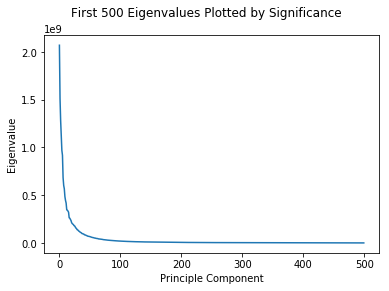

In [89]:
pca.plot_eigenvalues()

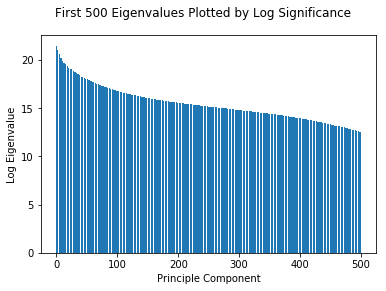

In [90]:
pca.plot_log_eigenvalues()

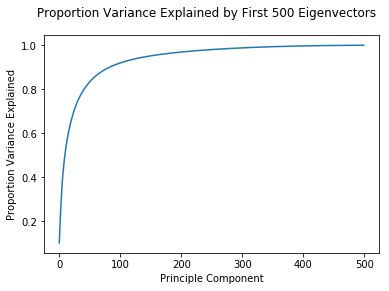

Proportion variance explained by first 500 PC's: 0.9993983059547238
Variance explained by first 500 PC's: 20603735864.27255


In [91]:
pca.variance_explained()

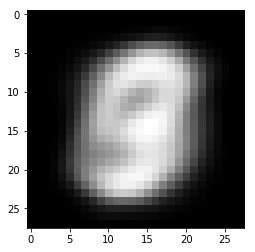

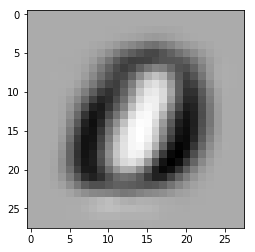

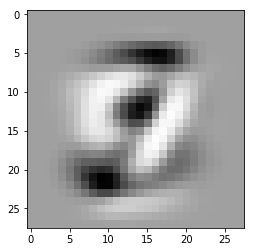

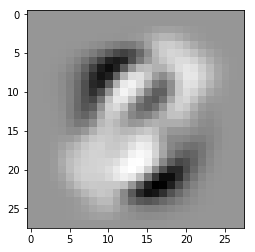

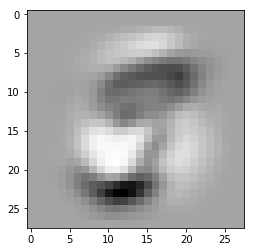

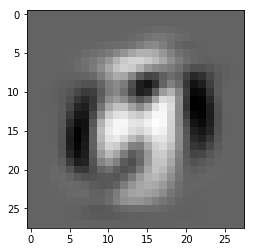

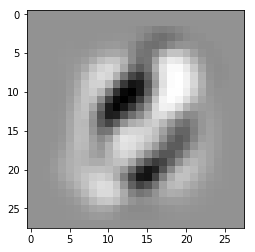

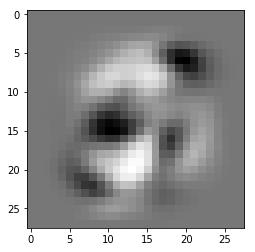

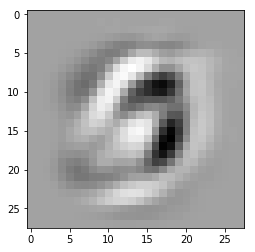

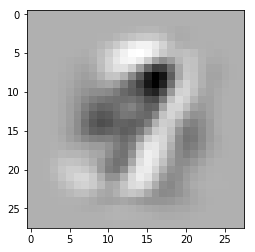

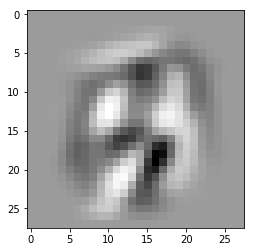

In [92]:
pca.show_images()

In [94]:
a, b = pca.reconstruct(10)
print(a)
print(b)
# as compared to .94 x 10^7 for Kmeans with K = 10

7777920.419735609
11024181.935521318


In [41]:
cov = 1/ pca.standardized.shape[1] * np.matmul(pca.standardized,pca.standardized.T)

In [42]:
u,s,_ = np.linalg.svd(cov)

In [43]:
np.linalg.norm(u[:,0])

0.9999999999999999

In [ ]:
pca.mean